# Big Data Modelling and Management 2022

Group number: 


1. Joana Tavares, m20210621

2. Laura Santos, r20181094

3. Maria Oliveira, m20210612

4. Mariana Ferreira, r20181071


## 🚚 BDMM Second Homework Assignment 🚚 

_The Wide World Importers (WWI) is a wholesales novelty goods importer and distributor operating from the San Francisco bay area. In this assignment we will be working with their database._ 
You can get more information and details about the WWI database in the following link: https://docs.microsoft.com/en-us/sql/samples/wide-world-importers-what-is?view=sql-server-ver15

The focus of the second assignment is modelling. We will use the World Wide Importers database and convert it to a document-based database. To that end, we will be leveraging concepts like data denormalization, indices, and mongodb design patterns. 

More information on the extended datamodel to be found here: </br>  
https://docs.microsoft.com/en-us/sql/samples/wide-world-importers-oltp-database-catalog?view=sql-server-ver15

## Problem Description

Your team has just arrived at WWI (a leading company in logistics). Welcome!   <br>
Even though business is thriving, the IT department is going through a bad time.   <br>
Digitalization was never a priority for the company and now the company operational and analytical requirements are starting to grow beyond the capabilities of their existing data architecture.   <br>

WWI data are spread accross different systems, but we've already managed to pull them all into a mongo dump file. This data file is an exact dump of the SQL data so includes all the same structure, the SQL tables become collections and the rows become documents. This means all the original SQL keys are included in the data.<br>
Currently, the costs to develop the necessary queries to collect data to answer questions asked by the different departments are too high. <br>

Management concluded it is the right time to revise and revamp the data architecture, in order to speed up operations. 

In that context, your team was tasked with merging all the company data into a single and coherent Mongo database. <br>
It is expected that, with your solution, WWI will have a better understanding of their business and that the different departments will be able to obtain efficiently the answers they need.

The WWI team shared with you an ERD of their current datamodel:<br>
![datamodel](./WWI.png)

**Note** You can open the file WWI.png that is in the same directory as this notebook to see the above image in more detail and zoom in as you need.

Addtionally, the WWI team asked you the deliver the following outputs in **4 weeks**:
- Understand and model the database in MongoDB.
- Setup the database so that it is performs well for the queries they have provided. You should include reasoning in comments for the decisions you make on modelling the database.
- Answer the questions (queries) on the data provided.  
- Submit the results by following the instructions.  

With these deliveries, you will have created a prototype and allows the management to decide whether MongoDB is a good solution that meets their requirements.

### Design Requirements

Note that WWI has the following query requirements for the database.

1. The web team needs to know:  
    1. Which state province do we have the most suppliers in?  
    2. How many people have three or more `OtherLanguage`? 
    3. Top 10 most common `OtherLanguage` for people records. 
    4. How many customer records are valid after `November 2015`? 
    5. What percentage of people records don't have the UserPreferences field? 

2. The warehouse group needs to know:  
    1. What is the average difference in days between OrderDate and ExpectedDeliveryDate for orders sold by (`SalespersonPersonID`) person with the name `Jack Potter`?
    2. Which items get ordered the most in bulk (largest average quantity ordered)?  
    3. Which two items get ordered together the most?
    4. For each customer category which 3 items have the ordered the most?
    5. What is the current stock of each stockgroup?

3. The CFO needs to know:  
    1. What is the monthly total order count for each month?  
    2. How many orders are there from the customer `Tailspin Toys (Head Office)`?
    3. What are the average monthly sales prices of all goods sold? 
    4. In each state province what is the average customer credit limit?   
    5. What are the yearly expenditures with each supplier (per supplier name)?  

4. Partnerships needs to know:  
    1. What is the most common payment type?  
    2. What percentage of people have their `Title` as `Team Member`?
    3. Which supplier of the category `Novelty Goods Supplier` has the most transactions?  
    4. What is the highest `CommissionRate` that a person has?

5. The marketing team needs to know:  
    1. What is the name of the sales person with the largest sum of invoice values in 2013 (person whose customers paid the most money)?
    2. Who are the most common `PickedByPersonID` person names for orders done by customer `Adriana Pena`?
    3. How many people have in their name the string `Sara`?
    5. What are the top 10 most Common Names (Primary or Surnames) of people?

Transform the mongo dump file provided with this notebook and model a database following mongodb's best practices. You should adjust the data model to best fit the use cases provided above. Think about collections, embedding, linking, indexing, and the patterns learned in class. Provide justifications for each decision you make. What, if any, are the trade-off's or disadvantages of your approach.

Use MongoDB queries to answer the questions on your transformed database.

### Deliverables

1. Notebook with all DB creation operations and CRUD operations to create the data model. **Important** you should include in comments justification for your decisions on modelling the data.;
2. Second notebook with all required queries and answers for the questions, **Important** please indicate with comments the steps in the data model you took to optimise each query;


# Additional Information

## Groups  

Students should form groups of at least 4 and at most 5. <br>

## Submission  Deadline

The submission includes two notebooks with outputs (cells must be run). 
Please make sure to indicate:
1. group number,
2. group members with student names and numbers,
3. the name of the database that you created. <br>

Upload the notebook on moodle before **23:59 on June 22nd**

## Evaluation   

The second homework assignment counts 40% towards your final mark of the curricular unit. <br>
The assignment will be scored from 0 to 20. <br>

Each group submission will be evaluated on three components:
1. correctness of results;
2. simplicity and performance characteristics of the solution;
3. justification of decisions.

50% -  Database design  
50% -  Query results including performance

Please note that all code delivered in this assignment will go through plagiarism automated checks. <br>
Groups with high similarity levels in their code will undergo investigation.


# Imports

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
from pprint import pprint
import numpy as np
from pymongo import MongoClient

# Connect to database

In [3]:
#!pip install pymongo

user ="AzureDiamond"
password="hunter2"
host="localhost"
port="27017"
protocol="mongodb"

client = MongoClient(f"{protocol}://{user}:{password}@{host}:{port}")

In [4]:
db = client.WideWorldImporters
print(f"Database info: {db}\n")

db.list_collection_names()

Database info: Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'WideWorldImporters')



['stockgroups',
 'people',
 'invoicelines',
 'packagetypes',
 'orderlines',
 'cities',
 'paymentmethods',
 'customers',
 'suppliers_embed',
 'invoices',
 'purchaseorderlines',
 'suppliercategories',
 'countries',
 'customercategories',
 'purchaseorders',
 'stateprovinces',
 'stockitems',
 'customertransactions_embed',
 'customer_transactions_embed',
 'colors',
 'supplier_embed',
 'customertransactions',
 'stockitemstransactions',
 'deliverymethods',
 'customer_embed',
 'transactiontypes',
 'suppliertransactions',
 'stockitemsstockgroups',
 'invoices_emb',
 'supplier_transactions_embed',
 'purchaseorders_embed',
 'cities_embed',
 'suppliers',
 'orders']

In [5]:
for collection in db.list_collection_names():
    print(collection)
    pprint(db[collection].find_one())
    print()

stockgroups
{'LastEditedBy': 1,
 'StockGroupID': 1,
 'StockGroupName': 'Novelty Items',
 'ValidFrom': datetime.datetime(2013, 1, 1, 0, 0),
 'ValidTo': datetime.datetime(9999, 12, 31, 23, 59, 59, 999000),
 '_id': ObjectId('6287c7a5636e5a12694aaa2b')}

people
{'CustomFields': 0.0,
 'EmailAddress': None,
 'FaxNumber': None,
 'FullName': 'Data Conversion Only',
 'HashedPassword': None,
 'IsEmployee': False,
 'IsExternalLogonProvider': False,
 'IsPermittedToLogon': False,
 'IsSalesperson': False,
 'IsSystemUser': False,
 'LastEditedBy': 1,
 'LogonName': 'NO LOGON',
 'OtherLanguages': None,
 'PersonID': 1,
 'PhoneNumber': None,
 'Photo': None,
 'PreferredName': 'Data Conversion Only',
 'SearchName': 'Data Conversion Only Data Conversion Only',
 'UserPreferences': '{"theme":"blitzer","dateFormat":"yy-mm-dd","timeZone": '
                    '"PST","table":{"pagingType":"full_numbers","pageLength": '
                    '25},"favoritesOnDashboard":true}',
 'ValidFrom': datetime.datetime(2016, 

 'FinalizationDate': datetime.datetime(2013, 1, 7, 0, 0),
 'IsFinalized': True,
 'LastEditedBy': 4,
 'LastEditedWhen': datetime.datetime(2013, 1, 7, 9, 0),
 'OutstandingBalance': Decimal128('0.00'),
 'PaymentMethodID': 4,
 'PurchaseOrderID': 1,
 'SupplierID': 2,
 'SupplierInvoiceNumber': '7290',
 'SupplierTransactionID': 134,
 'TaxAmount': Decimal128('47.03'),
 'TransactionAmount': Decimal128('360.53'),
 'TransactionDate': datetime.datetime(2013, 1, 2, 0, 0),
 'TransactionTypeID': 5,
 '_id': ObjectId('6287c7c4636e5a12694aaa56'),
 'paymentmethods': {'LastEditedBy': 1,
                    'PaymentMethodID': 4,
                    'PaymentMethodName': 'EFT',
                    'ValidFrom': datetime.datetime(2013, 1, 1, 0, 0),
                    'ValidTo': datetime.datetime(9999, 12, 31, 23, 59, 59, 999000),
                    '_id': ObjectId('6287c4c8636e5a12693da1ad')}}

purchaseorders_embed
{'Comments': None,
 'ContactPersonID': 2,
 'DeliveryMethodID': 9,
 'ExpectedDeliveryDate': dat

# Data Denormalization

## Embedding 

**PurchaseOrderLines and PurchaseOrders**

In [6]:
query_1 = {
        "$lookup":{
           "from": "purchaseorderlines",
           "localField": "PurchaseOrderID",
           "foreignField": "PurchaseOrderID",
           "as": "purchaseorderslines"
        }
    }


query_2 = {
    "$unwind": "$purchaseorderslines"
}


query_4 = { 
        "$merge" : {
            "into" : "purchaseorders_embed",
            #"whenMatched": "replace"
        } 
    }

pipeline = [query_1, query_2, query_4]

r = db.purchaseorders.aggregate(pipeline)

In [7]:
pprint(db.purchaseorders_embed.find_one({}))

{'Comments': None,
 'ContactPersonID': 2,
 'DeliveryMethodID': 9,
 'ExpectedDeliveryDate': datetime.datetime(2013, 1, 15, 0, 0),
 'InternalComments': None,
 'IsOrderFinalized': True,
 'LastEditedBy': 6,
 'LastEditedWhen': datetime.datetime(2013, 1, 2, 7, 0),
 'OrderDate': datetime.datetime(2013, 1, 1, 0, 0),
 'PurchaseOrderID': 1,
 'SupplierID': 2,
 'SupplierReference': 'B2084020',
 '_id': ObjectId('6287c74a636e5a1269498d5d'),
 'purchaseorderslines': {'Description': 'Pack of 12 action figures (female)',
                         'ExpectedUnitPricePerOuter': Decimal128('5.50'),
                         'IsOrderLineFinalized': True,
                         'LastEditedBy': 6,
                         'LastEditedWhen': datetime.datetime(2013, 1, 2, 7, 0),
                         'LastReceiptDate': datetime.datetime(2013, 1, 2, 0, 0),
                         'OrderedOuters': 18,
                         'PackageTypeID': 9,
                         'PurchaseOrderID': 1,
                   

**SalesInvoice_Lines and SalesInvoices*

In [ ]:
query_sales_inv_1 = {
        "$lookup":{
           "from": "invoicelines",
           "localField": "InvoiceID",
           "foreignField": "InvoiceID",
           "as": "invoicelines"
        }
    }

query_sales_inv_2 = { 
        "$merge" : {
            "into" : "invoices_emb",
        } 
    }

pipeline = [query_sales_inv_1, query_sales_inv_2]

r = db.invoices.aggregate(pipeline)

In [ ]:
print(db.invoices_emb.find_one({}))

In [ ]:
(db.invoices_emb.find_one({}))

**State Provinces and Cities**

In [8]:
query_1 = {
        "$lookup":{
           "from": "stateprovinces",
           "localField": "StateProvinceID",
           "foreignField": "StateProvinceID",
           "as": "provinces"
        }
    }


query_2 = {
    "$unwind": "$provinces"
}


query_3 = { 
        "$merge" : {
            "into" : "cities_embed",
            "whenMatched": "replace"
        } 
    }


pipeline = [query_1, query_2, query_3]

result = db.cities.aggregate(pipeline)

In [9]:
pprint(db.cities_embed.find_one({}))

{'CityID': 1,
 'CityName': 'Aaronsburg',
 'LastEditedBy': 1,
 'LatestRecordedPopulation': 613,
 'Location': None,
 'StateProvinceID': 39,
 'ValidFrom': datetime.datetime(2013, 1, 1, 0, 0),
 'ValidTo': datetime.datetime(9999, 12, 31, 23, 59, 59, 999000),
 '_id': ObjectId('6287c46b636e5a12693d0c54'),
 'provinces': {'Border': None,
               'CountryID': 230,
               'LastEditedBy': 8,
               'LatestRecordedPopulation': 13284753,
               'SalesTerritory': 'Mideast',
               'StateProvinceCode': 'PA',
               'StateProvinceID': 39,
               'StateProvinceName': 'Pennsylvania',
               'ValidFrom': datetime.datetime(2014, 7, 1, 16, 0),
               'ValidTo': datetime.datetime(9999, 12, 31, 23, 59, 59, 999000),
               '_id': ObjectId('6287c4fd636e5a12693da66d')}}


**Sales Customer and State Provincies/Cities - Delivery City**

In [10]:
query_1 = {
        "$lookup":{
           "from": "cities_embed",
           "localField": "DeliveryCityID",
           "foreignField": "CityID",
           "as": "delivery_cities"
        }
    }

query_2 = {
    "$unwind": "$delivery_cities"
}


query_3 = { 
        "$merge" : {
            "into" : "customer_embed",
        } 
    }


pipeline = [query_1, query_2, query_3]

r = db.customers.aggregate(pipeline)

In [11]:
print(db.customer_embed.find_one({}))

{'_id': ObjectId('6287c598636e5a12693dc817'), 'AccountOpenedDate': datetime.datetime(2013, 1, 1, 0, 0), 'AlternateContactPersonID': 1002, 'BillToCustomerID': 1, 'BuyingGroupID': 1, 'CreditLimit': None, 'CustomerCategoryID': 3, 'CustomerID': 1, 'CustomerName': 'Tailspin Toys (Head Office)', 'DeliveryAddressLine1': 'Shop 38', 'DeliveryAddressLine2': '1877 Mittal Road', 'DeliveryCityID': 19586, 'DeliveryLocation': None, 'DeliveryMethodID': 3, 'DeliveryPostalCode': '90410', 'DeliveryRun': '', 'FaxNumber': '(308) 555-0101', 'IsOnCreditHold': False, 'IsStatementSent': False, 'LastEditedBy': 1, 'PaymentDays': 7, 'PhoneNumber': '(308) 555-0100', 'PostalAddressLine1': 'PO Box 8975', 'PostalAddressLine2': 'Ribeiroville', 'PostalCityID': 19586, 'PostalPostalCode': '90410', 'PrimaryContactPersonID': 1001, 'RunPosition': '', 'StandardDiscountPercentage': Decimal128('0.000'), 'ValidFrom': datetime.datetime(2013, 1, 1, 0, 0), 'ValidTo': datetime.datetime(9999, 12, 31, 23, 59, 59, 999000), 'WebsiteURL

**Sales Customer and State Provincies/Cities - Postal City**

In [12]:
query_1 = {
        "$lookup":{
           "from": "cities_embed",
           "localField": "PostalCityID",
           "foreignField": "CityID",
           "as": "postal_cities"
        }
    }

query_2 = {
    "$unwind": "$postal_cities"
}


query_3 = { 
        "$merge" : {
            "into" : "customer_embed",
        } 
    }


pipeline = [query_1, query_2, query_3]

r = db.customers.aggregate(pipeline)

In [13]:
print(db.customer_embed.find_one({}))

{'_id': ObjectId('6287c598636e5a12693dc817'), 'AccountOpenedDate': datetime.datetime(2013, 1, 1, 0, 0), 'AlternateContactPersonID': 1002, 'BillToCustomerID': 1, 'BuyingGroupID': 1, 'CreditLimit': None, 'CustomerCategoryID': 3, 'CustomerID': 1, 'CustomerName': 'Tailspin Toys (Head Office)', 'DeliveryAddressLine1': 'Shop 38', 'DeliveryAddressLine2': '1877 Mittal Road', 'DeliveryCityID': 19586, 'DeliveryLocation': None, 'DeliveryMethodID': 3, 'DeliveryPostalCode': '90410', 'DeliveryRun': '', 'FaxNumber': '(308) 555-0101', 'IsOnCreditHold': False, 'IsStatementSent': False, 'LastEditedBy': 1, 'PaymentDays': 7, 'PhoneNumber': '(308) 555-0100', 'PostalAddressLine1': 'PO Box 8975', 'PostalAddressLine2': 'Ribeiroville', 'PostalCityID': 19586, 'PostalPostalCode': '90410', 'PrimaryContactPersonID': 1001, 'RunPosition': '', 'StandardDiscountPercentage': Decimal128('0.000'), 'ValidFrom': datetime.datetime(2013, 1, 1, 0, 0), 'ValidTo': datetime.datetime(9999, 12, 31, 23, 59, 59, 999000), 'WebsiteURL

**Suppliers into Suppliers Transactions**

In [14]:
query_1 = {
        "$lookup":{
           "from": "suppliers",
           "localField": "SupplierID",
           "foreignField": "SupplierID",
           "as": "supplier_info"
        }
    }


query_2 = {
    "$unwind": "$supplier_info"
}


query_3 = { 
        "$merge" : {
            "into" : "supplier_embed",
        } 
    }

pipeline = [query_1, query_2, query_3]

result = db.suppliertransactions.aggregate(pipeline)

In [15]:
pprint(db.supplier_embed.find_one({}))

{'AmountExcludingTax': Decimal128('313.50'),
 'FinalizationDate': datetime.datetime(2013, 1, 7, 0, 0),
 'IsFinalized': True,
 'LastEditedBy': 4,
 'LastEditedWhen': datetime.datetime(2013, 1, 7, 9, 0),
 'OutstandingBalance': Decimal128('0.00'),
 'PaymentMethodID': 4,
 'PurchaseOrderID': 1,
 'SupplierID': 2,
 'SupplierInvoiceNumber': '7290',
 'SupplierTransactionID': 134,
 'TaxAmount': Decimal128('47.03'),
 'TransactionAmount': Decimal128('360.53'),
 'TransactionDate': datetime.datetime(2013, 1, 2, 0, 0),
 'TransactionTypeID': 5,
 '_id': ObjectId('6287c7c4636e5a12694aaa56'),
 'supplier_info': {'AlternateContactPersonID': 24,
                   'BankAccountBranch': 'Woodgrove Bank Greenbank',
                   'BankAccountCode': '358698',
                   'BankAccountName': 'Contoso Ltd',
                   'BankAccountNumber': '4587965215',
                   'BankInternationalCode': '25868',
                   'DeliveryAddressLine1': 'Unit 2',
                   'DeliveryAddressLine2

**Customer and Customer Category**

In [16]:
query_1 = {
        "$lookup":{
           "from": "customercategories",
           "localField": "CustomerCategoryID",
           "foreignField": "CustomerCategoryID",
           "as": "customer_category"
        }
    }


query_2 = {
    "$unwind": "$customer_category"
}


query_3 = { 
        "$merge" : {
            "into" : "customer_embed",
        } 
    }

pipeline = [query_1, query_2, query_3]

result = db.customers.aggregate(pipeline)

In [17]:
pprint(db.customer_embed.find_one({}))

{'AccountOpenedDate': datetime.datetime(2013, 1, 1, 0, 0),
 'AlternateContactPersonID': 1002,
 'BillToCustomerID': 1,
 'BuyingGroupID': 1,
 'CreditLimit': None,
 'CustomerCategoryID': 3,
 'CustomerID': 1,
 'CustomerName': 'Tailspin Toys (Head Office)',
 'DeliveryAddressLine1': 'Shop 38',
 'DeliveryAddressLine2': '1877 Mittal Road',
 'DeliveryCityID': 19586,
 'DeliveryLocation': None,
 'DeliveryMethodID': 3,
 'DeliveryPostalCode': '90410',
 'DeliveryRun': '',
 'FaxNumber': '(308) 555-0101',
 'IsOnCreditHold': False,
 'IsStatementSent': False,
 'LastEditedBy': 1,
 'PaymentDays': 7,
 'PhoneNumber': '(308) 555-0100',
 'PostalAddressLine1': 'PO Box 8975',
 'PostalAddressLine2': 'Ribeiroville',
 'PostalCityID': 19586,
 'PostalPostalCode': '90410',
 'PrimaryContactPersonID': 1001,
 'RunPosition': '',
 'StandardDiscountPercentage': Decimal128('0.000'),
 'ValidFrom': datetime.datetime(2013, 1, 1, 0, 0),
 'ValidTo': datetime.datetime(9999, 12, 31, 23, 59, 59, 999000),
 'WebsiteURL': 'http://www.

**PaymentMethods in SupplierTransactions**

In [18]:
query_1 = {
    "$lookup":{
        "from":"paymentmethods",
        "localField":"PaymentMethodID",
        "foreignField":"PaymentMethodID",
        "as":"paymentmethods"
    }
}

query_2 = {
    "$unwind":"$paymentmethods"
}

query_3 = {
    "$merge":{
        "into":"supplier_transactions_embed",
    }
}


pipeline = [query_1, query_2, query_3]
r = db.suppliertransactions.aggregate(pipeline)

In [19]:
#pprint(db.supplier_transactions_embed.find_one({}))

**PaymentMethods in CustomerTransactions**

In [20]:
query_1 = {
    "$lookup":{
        "from":"paymentmethods",
        "localField":"PaymentMethodID",
        "foreignField":"PaymentMethodID",
        "as":"paymentmethods"
    }
}


query_2 = {
    "$unwind":"$paymentmethods"
}



query_3 = {
    "$merge":{
        "into":"customer_transactions_embed",
    }
}


pipeline = [query_1, query_2, query_3]
r = db.customertransactions.aggregate(pipeline)

In [21]:
#pprint(db.customer_transactions_embed.find_one({}))

**SupplierCategories in Suppliers**

In [22]:
query_1 = {
    "$lookup":{
        "from":"suppliercategories",
        "localField":"SupplierCategoryID",
        "foreignField":"SupplierCategoryID",
        "as":"suppliercategories"
    }
}


query_2 = {
    "$unwind":"$suppliercategories"
}



query_3 = {
    "$merge":{
        "into":"suppliers_embed",
    }
}


pipeline = [query_1, query_2, query_3]
r = db.suppliers.aggregate(pipeline)

In [23]:
#pprint(db.suppliers_embed.find_one({}))

**Invoices and InvoiceLines**

In [ ]:
query_1 = {
        "$lookup":{
           "from": "invoicelines",
           "localField": "InvoiceID",
           "foreignField": "InvoiceID",
           "as": "invoicelines"
        }
    }

query_2 = { 
        "$merge" : {
            "into" : "invoices_emb",
        } 
    }


pipeline = [query_1, query_2]

r = database.invoices.aggregate(pipeline)

In [ ]:
pprint(database.invoices_emb.find_one())

**Customers and Orders**

In [ ]:
query_1 = {
        "$lookup":{
           "from": "orders",
           "localField": "CustomerID",
           "foreignField": "CustomerID",
           "as": "orders"
        }
    }


query_2 = { 
        "$merge" : {
            "into" : "customers_emb",
        } 
    }

pipeline = [query_1, query_2]

r = database.customers.aggregate(pipeline)

In [ ]:
pprint(database.customers_emb.find_one())

## Warning

Before answering the proposed questions, it is important to state that we performed one modification on the studio 3T. 
To simplify analysis for queries where the field ```CustomFields```from the collection ```people``` was mentioned, we decided to split ```CustomFields```column. To do so, we ran the following code on the IntelliShell of studio 3T:</p>
<code> db.people.find().forEach(function(data){db.people.update({_id:data._id},{"$set":{CustomFields:JSON.parse(data.CustomFields)}}); }); </code>

The usage of this code allow us to separate the columns as ti follows:

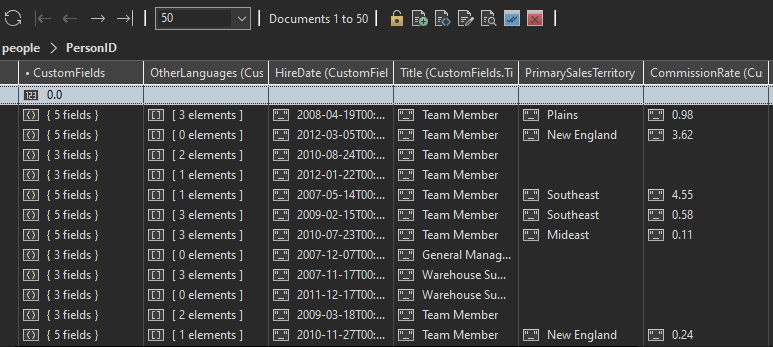

# Question 1

**A. Which state province do we have the most suppliers in?**

**B. How many people have three or more ``OtherLanguage`` ?**

**C. Top 10 most common ``OtherLanguage`` for people records.**

**D. How many customers records are valid after ``November 2015``?**

**E. What percentage of people records don't have the ``UserPreferences`` field?**

# Question 2

**A. What is the average difference in days between OrderDate and ExpectedDeliveryDate for orders sold by (`SalespersonPersonID`) person with the name `Jack Potter`?**


We want to acess information about order and expected delivery date - orders collection, and sales person - people collection. Let's take a look at each step that was performed:
1. in the first query we use lookup to perform a equality match between the Field PersonID from the people document with the field SalespersonPersonID of the orders collection
2. info_person is the new array field to add to the joined documents
3. we matched the full name from the info person array that matches - or is equal - to Jack Potter
4. in query 3 we projected the fileds to pass to the next query - salespersonID, Full Name of the sales person and the difference in days
5. difference in days was obtained by computing the expected delivery date and order date
6. subtract operator returns the difference between the two dates in milliseconds
7. we grouped by the Name of Jack Potter and computed the average of the difference in days of all the orders order by him and projected the field of the difference in days diving the previously computed difference in days by 86400000 to transform  the value that was in milliseconds to days - 1 day is equal to 86.400.000 milliseconds so to convert the value we need to divide it by 86.400.000
8. we rounded the final value to appear with 2 decimal places



In [ ]:
query_2a_1 = {
    "$lookup":
    {
       'from': 'people',
       'localField': 'SalespersonPersonID',
       'foreignField': 'PersonID',
       'as': 'info_person'
     }
}

query_2a_2 ={
    '$match': {
        'info_person.FullName' : {'$eq' : 'Jack Potter'}
    }
}

query_2a_3 = {
    '$project' : {
        '_id' : False,
        'SalespersonPersonID' : 1,
        'info_person.FullName' : 1,
        'difference_days' : { '$subtract': [ '$ExpectedDeliveryDate', '$OrderDate' ] },
    }
}


query_2a_4 = {
    '$group': {
        '_id': {'FullName' : '$PersonInfo.FullName'}, 
        'average_dif' : {'$avg' : '$difference_days'}            
    }
}

query_2a_5 = {
    '$project' : {
        '_id' : False,
        'Average difference between expected delivery date and order date in days' : {'$round' : [{'$divide' : ['$average_dif', 86400000]}, 2]}
    }
}

In [ ]:
pipeline = [query_2a_1, query_2a_2, query_2a_3, query_2a_4, query_2a_5]
q_2_a = list(db.orders.aggregate(pipeline))
q_2_a

**B. Which items get ordered the most in bulk (largest average quantity ordered)?**

In [ ]:
#por fazer

**C. Which two items get ordered together the most?**

In [ ]:
#esperar

**D. For each customer category which 3 items have the ordered the most?**

In [ ]:
#ver e confirmar

We want to acess information about customer category -customer_embed collection, and ordered items - invoices_emb collection. Let's look at the step by step resolution:
1. In the first query, we use lookup to perform a equality match between the Field CustomerID from the input document with the same field in the joined collection, which is the customer_embed
2. info_customer is the new array field to add to the joined couments
3. In the second query, we specified the fields that we wanted to pass along to the next query: the CustomerCategoryName which is inside the field customer_category and we also want to pass the field of the StockItemID
4. Next, we unwinded the field invoicelines because for some invoiceIDs this field has multiple invoicelineIDs inside without the unwind the groupby would return an array with the stockItems for each invoice which we did not want
5. After the unwind, we grouped by customer category and stock item id - we want each item to appear in separately - and summed how many orders with a specific item and customer category exists to query returned the number of orders for every combination but we needed to make other groupby to group the information regarding the number of orders for every category in order to be able to sort and limit 3 items for every category
6. Therefore, we performed another group by, goruping by customer category and pusehd the values of the item and number of orders to an array
7. After this, we wanted to limit for each category, the most 3 ordered items but to order the number of orders we needed to unwind the OrderInfo field - where the number of orders was located- and after that we sorted from an descending order so that the most ordered items appeared in the beggining
8. Following, we did other group by, similar to the previous one, but now with the values in a descending order
9. Finally, we projected the fields to appear in the ouput - the id which is the customer category and the most 3 ordered items to get the 3 most ordered items, we used the slice projection operator, which returned the 3 first values in the array since it was ordered, the first 3 items were the ones with a bigger amount of orders

In [ ]:
query_2d_1 = {
    "$lookup":
    {
       'from': 'customer_embed',
       'localField': 'CustomerID',
       'foreignField': 'CustomerID',
       'as': 'info_customer'
     }
}


query_2d_2 = {
    '$project' : 
    {
        '_id' : False,
        'info_customer.customer_category.CustomerCategoryName' : 1,
        'invoicelines.StockItemID':1
    }
}

query_2d_3 = {'$unwind':  "$invoicelines"}


query_2d_4 = {
    '$group': 
    {
        '_id': {'Customer Category' : '$info_customer.customer_category.CustomerCategoryName', 'item': '$invoicelines.StockItemID'}, 
        'number of order items' : {'$sum' : 1}
    }
}


query_2d_5 = {
    "$group": 
    {
    "_id": "$_id.Customer Category",
    "OrderInfo": 
        {"$push": 
            {"item": '$_id.item',"nr_orders": "$number of order items"}
        }
    }
}

query_2d_6 = {'$unwind': '$OrderInfo'}

query_2d_7 = {'$sort': {'OrderInfo.nr_orders' : -1 }}

query_2d_8 = { 
    "$group": 
    {
    "_id": "$_id",
    "OrderInfo": 
        {"$push": "$OrderInfo"}
    }
}


query_2d_9 = {
    '$project': 
    {
    "_id": False,
    "Customer Category": "$_id",
    "Most ordered items": { "$slice": [ "$OrderInfo.nr_orders", 3 ]}
    }
}


In [ ]:
pipeline = [query_2d_1, query_2d_2, query_2d_3, query_2d_4, query_2d_5,query_2d_6, query_2d_7, query_2d_8, query_2d_9]
q_2_d = list(db.invoices_emb.aggregate(pipeline))
q_2_d

**E. What is the current stock of each stockgroup?**

In [ ]:
query_2e_1 = {
    '$project': {
        '_id': 1,
        'StockGroupID': 1,
        'StockItemID': 1,
        'GroupName': '$stockgroup.StockGroupName'
    }
}


query_2e_2 = {
    '$group': {
            '_id': '$GroupName',
            'NumberOfItems': {'$sum': 1}
    }
}


query_2e_3 = { 
        '$sort' : {'NumberOfItems': -1}
    }


pipeline = [query_2e_1, query_2e_2, query_2e_3] #, query_2, query_3, query_4, query_5, query_6, query_7,, query_3,  query_6, ]
q_2_e = list(database.itemstockgroups_emb.aggregate(pipeline))
q_2_e

# Question 3

**A. What is the monthly total order count for each month?**

In [ ]:
# we grouped by the month of each Order Date and computed the number of orders for each month using the sum aggregation function
query_3a_1 = {
    "$group": 
    {
    "_id": {"month": { "$month": { "$toDate": "$OrderDate"}}}, 
    "numberoforders": {"$sum": 1} 
    }
}

# sorted the ouput by month number
query_3a_2 = {"$sort":{"_id":1}}


pipeline = [query_3a_1, query_3a_2]
q_3_a = list(db.orders.aggregate(pipeline))
q_3_a

**B. How many orders are there from the customer `Tailspin Toys (Head Office)`?**

In [ ]:
# firstly, we matched the CustomerName field to Tailspin Toys (Head Office)
query_3b_1 = {'$match': {'CustomerName': 'Tailspin Toys (Head Office)'}}


# then we use the lookup to join the orders and customers coleections by the common field - CustomerID
query_3b_2 = {
    "$lookup":
    {
       "from": "orders",
       "localField": "CustomerID",
       "foreignField": "CustomerID",
       "as": "orders"
     }
}


# then we projected the fields to appear in the ouput - the id that corresponds to the name of the customer we were interested in
# and the size of the array created in lookup which is referent to the orders of that customer, using the size operator
query_3b_3 = {
    "$project":
    {
    "_id": 0,
    'Customer Name': '$CustomerName',
    "Number of Orders": {'$size':"$orders"}
    }
}


pipeline = [query_3b_1, query_3b_2, query_3b_3]
q_3_b = list( db.customers.aggregate(pipeline))
q_3_b

**Answer:** The customer ``Tailspin Toys (Head Office)`` made 129 orders.

**C. What are the average monthly sales prices of all goods sold?** 

In [ ]:
# we grouped the purchase orders by month of the Order Date and calculated the average monthly sales
# using the average operator on the field Expected Unit Price Per Outer in each Purchase order lines field

query_3c_1 = {
    "$group":
    {
    "_id": {"month": { "$month": { "$toDate": "$OrderDate"}}}, 
    "Avg monthly Sales": {"$avg": "$purchaseorderslines.ExpectedUnitPricePerOuter"} 
    }
}

# nextly we sorted by month and projected the ouput fields, rounding the average monthly sales to 2 decimal places
query_3c_2 = {"$sort":{"_id":1}}

query_3c_3 = {
    '$project':
    {
    '_id' : True,
    'Average Monthly Sales' : {'$round' : ["$Avg monthly Sales", 2]}
    }
}

pipeline = [query_3c_1, query_3c_2, query_3c_3]
q_3_c = list(db.purchaseorders_embed.aggregate(pipeline))
q_3_c

**D. In each state province what is the average customer credit limit?**  

In [ ]:
# we used the State Pronvince in which the city corresponding to the Postal City is, from the customer_embed collection
#we grouped the pronvinces by their Porvince Name and calculated the avreage value for the credit limit for each one
query_3d_1 = {
    "$group": 
    {
    "_id": {"Province": "$postal_cities.provinces.StateProvinceName"},
    "credit limit":{"$avg":"$CreditLimit"}
    }
}

# sorted the values by the Province Name
query_3d_2 = {"$sort":{"_id":1}}


# Projected the fields to appear in the ouput - ID that corresponds to the Province and the credit limit average value rounded to 2 decimal places
query_3d_3 = {
    '$project':
    {
    '_id' : True,
    'Average Customer Credit Limit' : {'$round' : ["$credit limit", 2]}
    }
}

pipeline = [query_3d_1, query_3d_2, query_3d_3]
q_3_d = list(db.customer_embed.aggregate(pipeline))
q_3_d

**E. What are the yearly expenditures with each supplier (per supplier name)?**

In [ ]:
# we assume the yearly expenditures are the Transactions Amounts relative to the Suppliers Invoice
# the first query matches the transactions whose TransactionTypeID is 5 because they correspond to the transactions of "Suppliers Invoices"
# which is what we are interested in to compute the yearly expenditure
query_3e_1 = {'$match': {'TransactionTypeID': 5}}


# in the second query we grouped the transactions by the year of the Transaction Date and by the supplier name and calculated the sum of the transactions
query_3e_2 = {
    "$group": 
    {
    "_id": {"year": {"$year" : "$TransactionDate"}, "supplier_name":"$supplier.SupplierName"},
    "Expenditure":{"$sum":"$TransactionAmount"}
    }}


# finally, ordered the ouput by the id 
query_3e_3 = {"$sort":{"_id":1}}

pipeline = [ query_3e_1, query_3e_2, query_3e_3]
q_3_e = list(db.supplier_embed.aggregate(pipeline))
q_3_e

# Question 4

**A. What is the most common payment type?**

In [27]:
#First thing, we will group the payments by method name
query_4a_1 = {
    '$group': {
        '_id' : '$paymentmethods.PaymentMethodName',
        'count' : {'$sum' : 1}
    }
}

#Then, we will use $lookup to perform a left outer join of supplier_transactions_embed to paymentmethods
query_4a_2 = {
    "$lookup":{
        "from": "supplier_transactions_embed",
        "localField": "_id",
        "foreignField": "paymentmethods.PaymentMethodName",
        "as": "supplier_transactions_embed"
     }
}


#After, use unwind to take the array of information from supplier_transactions_embed 
query_4a_3 = {
    "$unwind": "$supplier_transactions_embed"
}


#For each payment type, count the number of payments made by customers and suppliers
query_4a_4 = {
    '$group': {
        '_id' : '$_id',
        'customers' : { '$first': '$count' },
        'suppliers' : {'$sum' : 1}
    }
}

#Finally, sum the total number of payments
query_4a_5 = {
    '$project': {
        '_id' : 0,
        'payment_type' : '$_id',
        'count': { '$sum': [ "$customers", "$suppliers" ] }
    }
}



pipeline = [query_4a_1, query_4a_2, query_4a_3, query_4a_4, query_4a_5]

q_4_a = list(db.customer_transactions_embed.aggregate(pipeline))
q_4_a

[{'payment_type': 'EFT', 'count': 29075}]

**Answer:** The monst common way to pay is using ``EFT`` with a total of 29075 transaction being made with said payment type.

**B. What percentage of people have their Title as Team Member?**

customFields -> 'CustomFields': '{ "OtherLanguages": [] ,"HireDate":"2007-12-07T00:00:00","Title":"General Manager"}'

In [ ]:
# falta a parte da percentagem

In [26]:
query_4b_1 = {
    '$project' : {
        '_id' : 0,
        'CustomFields' : 1
    }
}
query_4b_2 = { 
    '$match' : {
        'CustomFields.Title': 'General Manager'
        } 
    }

pipeline = [query_4b_1, query_4b_2]

q_4_b = db.people.aggregate(pipeline)
list(q_4_b)


[{'CustomFields': {'OtherLanguages': [],
   'HireDate': '2007-12-07T00:00:00',
   'Title': 'General Manager'}},
 {'CustomFields': {'OtherLanguages': ['Arabic'],
   'HireDate': '2009-05-29T00:00:00',
   'Title': 'General Manager',
   'PrimarySalesTerritory': 'Southeast',
   'CommissionRate': '3.97'}}]

**C. Which supplier of the category `Novelty Goods Supplier` has the most transactions?**

In [23]:
#Use match to search for all records in suppliers_embed where the SupplierCategoryName is Novelty Goods Supplier
query_4c_1 = {
    '$match':{
                'SupplierID':{'$in' : list(db.suppliers_embed.distinct('SupplierID',
                                    {'suppliercategories.SupplierCategoryName':'Novelty Goods Supplier'}))
    }
}}


#We will set SupplierID as the id of a supplier
query_4c_2 = {
    '$project':{
                '_id':False,
                'supplier_id':'$SupplierID'
    }
}

#Query 3 and 4 will count and order the transactions of supplier with said category in a descending order
query_4c_3 = {
    '$group': {
        '_id': '$supplier_id', 
        'count' : {'$sum' : 1}            
}
}

query_4c_4 = {
    '$sort': {
        'count' : -1}            
}


#Once again, we will use $lookup to perform a left outer join
query_4c_5 =     {
        '$lookup': {
           "from": "suppliers_embed",
           "localField": "_id",
           "foreignField": "SupplierID",
           "as": "suppliers_embed"
        }}

#Finally, create a result set 
query_4c_6 = {
    '$project' :{
        '_id' : '$suppliers_embed.SupplierName',
        'count' : '$count'
    }
}


pipeline = [query_4c_1, query_4c_2, query_4c_3, query_4c_4, query_4c_5, query_4c_6]

q_4_c = list(db.suppliertransactions.aggregate(pipeline))

[{'_id': ['Graphic Design Institute'], 'count': 16},
 {'_id': ['The Phone Company'], 'count': 7},
 {'_id': ['A Datum Corporation'], 'count': 7},
 {'_id': ['Contoso, Ltd.'], 'count': 2}]

**Answer:** ``Graphic Design Institute`` is the supplier that has the most transactions (16), out of the category ``Novelty Goods Supplier``

**D. What is the highest ComissionRate that a person has?**

In [28]:
query_4d_1 = {
    '$project' : {
        '_id' : 0,
        'CustomFields' : 1
    }
}

query_4d_2 = {
    '$match' : {
        'CustomFields.CommissionRate' : {'$exists': 1}
    }
}

query_4d_3 = {
    '$project' : {
        '_id' : 0,
        'CommissionRate' : '$CustomFields.CommissionRate'
    }
}

query_4d_4 = {
    '$sort' : {'CommissionRate' : -1}
}

query_4d_5 = {
    '$limit' : 1
}

pipeline = [query_4d_1, query_4d_2, query_4d_3, query_4d_4, query_4d_5]

q_4_d = list(db.people.aggregate(pipeline))

q_4_d

[{'CommissionRate': '4.55'}]

# Question 5

5. The marketing team needs to know:  



**A. What is the name of the sales person with the largest sum of invoice values in 2013 (person whose customers paid the most money)?**

In [ ]:
query_5a_1 = {
        '$unwind': '$invoicelines'
    }


query_5a_2 = {
    '$project': {
        '_id': 1,
        'SalespersonPersonID': 1,
        'InvoiceYear': {'$year': '$InvoiceDate'},
        'SalesAmount': {'$multiply': ['$invoicelines.Quantity','$invoicelines.UnitPrice']}
    }
}

query_5a_3 = { 
        '$match' : {
            'InvoiceYear': {'$eq': 2013}
        } 
    }

query_5a_4 = {
    '$group': {
            '_id': '$SalespersonPersonID',
            'TotalSalesAmount': {'$sum': '$SalesAmount'}
    }
}

query_5a_5 = {
        '$lookup':{
           'from': 'people',
           'localField': '_id',
           'foreignField': 'PersonID',
           'as': 'SalesPerson'
        }
    }


query_5a_6 = {
    '$project': {
        '_id': 0,
        'FullName': '$SalesPerson.FullName',
        'TotalSalesAmount': 1
    }
}

query_5a_7 = { 
        '$sort' : {'TotalSalesAmount': -1}
    }

query_5a_8 = {
    '$limit': 1
}

pipeline = [query_5a_1, query_5a_2, query_5a_3, query_5a_4, query_5a_5, query_5a_6, query_5a_7, query_5a_8]

q_5_a = list(database.invoices_emb.aggregate(pipeline))
q_5_a

**Answer:** The sales person with the largest sum of invoices value in 2013 is Hudson Onslow, with a total of 4864279.75.

**B. Who are the most common `PickedByPersonID` person names for orders done by customer `Adriana Pena`?**

In [ ]:
query_5b_1 = {
        '$unwind': '$orders'
    }

query_5b_2 = { 
    '$match' : {
        'CustomerName': 'Adriana Pena'
        } 
    }

query_5b_3 = {
    '$project': {
        '_id': 0,
        "CustomerName": 1,
        'PickedByPersonID':'$orders.PickedByPersonID'
    }
}


query_5b_4 = {
        '$lookup':{
           'from': 'people',
           'localField': 'PickedByPersonID',
           'foreignField': 'PersonID',
           'as': 'People'
        }
    }


query_5b_5 = {
    '$unwind': '$People'
}


query_5b_6 = {
    '$project': {
        '_id': 0,
        "CustomerName": 1,
        'PickedByPersonID': 1,
        'PickedByPersonName':'$People.FullName',
        
    }
}

query_5b_7 = {
    '$group': {
        '_id': "$PickedByPersonName",
        'NumberOrders':{'$sum' : 1}
    }
}


query_5b_8 = { 
        '$sort' : {'NumberOrders': -1}
    }

query_5b_9 = {
    '$limit': 3
}

pipeline = [query_5b_1, query_5b_2, query_5b_3, query_5b_4, query_5b_5, query_5b_6, query_5b_7, query_5b_8, query_5b_9] 

q_5_b = list(database.customers_emb.aggregate(pipeline))
q_5_b

**C. How many people have in their name the string `Sara`?**

In [ ]:
database.people.count_documents({"FullName":{'$regex' : '.*Sara.*'}})

In [ ]:
list(database.people.find({"FullName":{'$regex' : '.*Sara.*'}}))

**D. What are the top 10 most Common Names (Primary or Surnames) of people?**

In [ ]:
query_5d_1 = {
    '$project': {
        '_id': 1,
        'PersonID': 1,
        'FullName': 1,
        'SplitName': {'$split': [ "$FullName", " " ]}        
    }
}




query_5d_2 = {
    '$limit': 3
}

pipeline = [query_5d_1, query_5d_2]

q_5_d = list(database.people.aggregate(pipeline))
q_5_d